# *Decision Tree*

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('heart_disease.xlsx', sheet_name=1)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0.0


In [4]:
df.shape, df.columns

((908, 13),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
        'exang', 'oldpeak', 'slope', 'thal', 'num'],
       dtype='object'))

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: bool(1), float64(6), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
sheet1 = pd.read_excel('heart_disease.xlsx', sheet_name=0)

In [9]:
sheet1.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

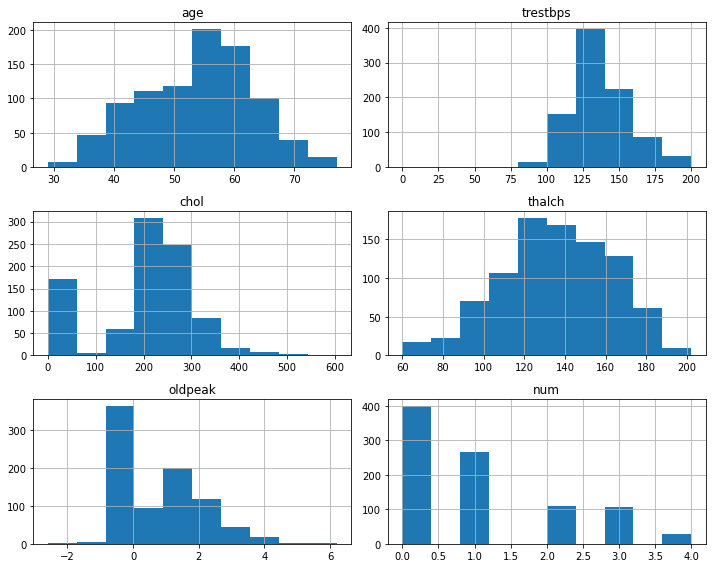

In [11]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

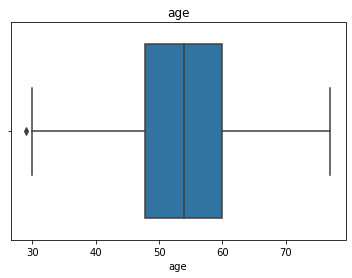

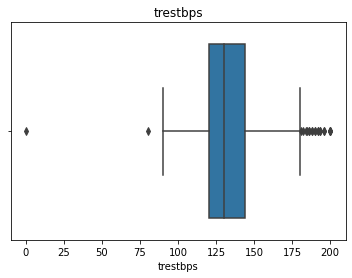

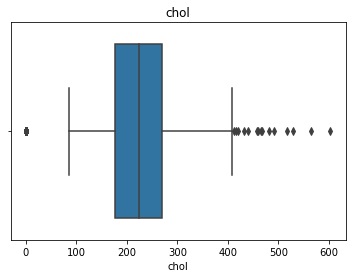

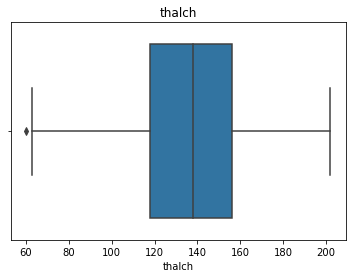

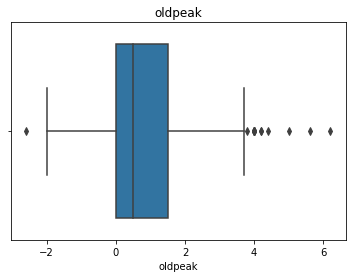

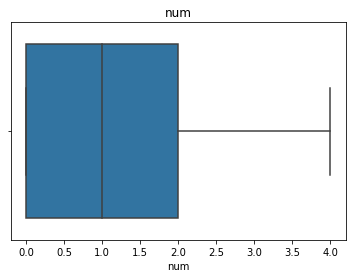

In [15]:
for c in num_cols:
    plt.figure()
    sns.boxplot(x=df[c])
    plt.title(c)

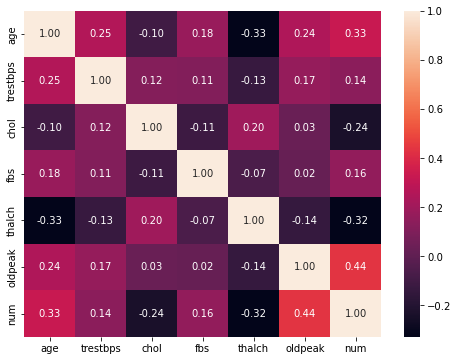

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [18]:
df = df.fillna(df.select_dtypes(include=[np.number]).median())

In [19]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [24]:
X = df.drop('num', axis=1)
y = df['num']

In [21]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [23]:
df.columns.tolist()

['age',
 'trestbps',
 'chol',
 'fbs',
 'thalch',
 'oldpeak',
 'num',
 'sex_Male',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'restecg_normal',
 'restecg_st-t abnormality',
 'exang_True',
 'exang_FALSE',
 'exang_TURE',
 'slope_flat',
 'slope_upsloping',
 'thal_normal',
 'thal_reversable defect']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [34]:
pred_y = tree_model.predict(test_x)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [36]:
pred_y = tree_model.predict(test_x)

Decision Tree Performance:
Accuracy: 0.47
Precision: 0.47
Recall: 0.47
F1-score: 0.47
ROC-AUC: 0.58


In [37]:
print("Decision Tree Performance:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc:.2f}")

Decision Tree Performance:
Accuracy: 0.47
Precision: 0.47
Recall: 0.47
F1-score: 0.47
ROC-AUC: 0.58


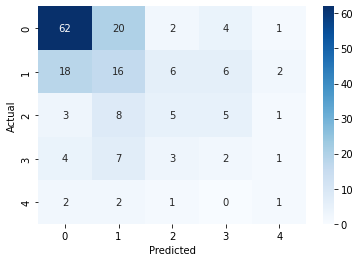

In [38]:
sns.heatmap(confusion_matrix(test_y, pred_y), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,4,6],
    'criterion': ['gini', 'entropy']
}

In [42]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(train_x, train_y)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}

In [55]:
best_tree = grid.best_estimator_
best_tree.fit(train_x, train_y)
best_pred = best_tree.predict(test_x)

# *Final Answers* 

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

Evaluate model performance

In [57]:
acc = accuracy_score(test_y, best_pred)
prec = precision_score(test_y, best_pred, average='weighted', zero_division=0)
rec = recall_score(test_y, best_pred, average='weighted', zero_division=0)
f1 = f1_score(test_y, best_pred, average='weighted', zero_division=0)

In [58]:
print("Final Decision Tree Results:")
print("----------------------------")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")

Final Decision Tree Results:
----------------------------
Accuracy  : 0.5659
Precision : 0.4674
Recall    : 0.5659
F1 Score  : 0.5089


Detailed classification report

In [59]:
print("\nClassification Report:")
print(classification_report(test_y, best_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.84      0.77        89
         1.0       0.39      0.54      0.46        48
         2.0       0.00      0.00      0.00        22
         3.0       0.22      0.12      0.15        17
         4.0       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.47      0.57      0.51       182



Confusion matrix

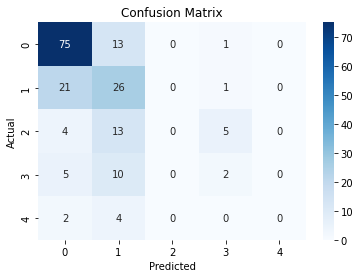

In [60]:
cm = confusion_matrix(test_y, best_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Visualization

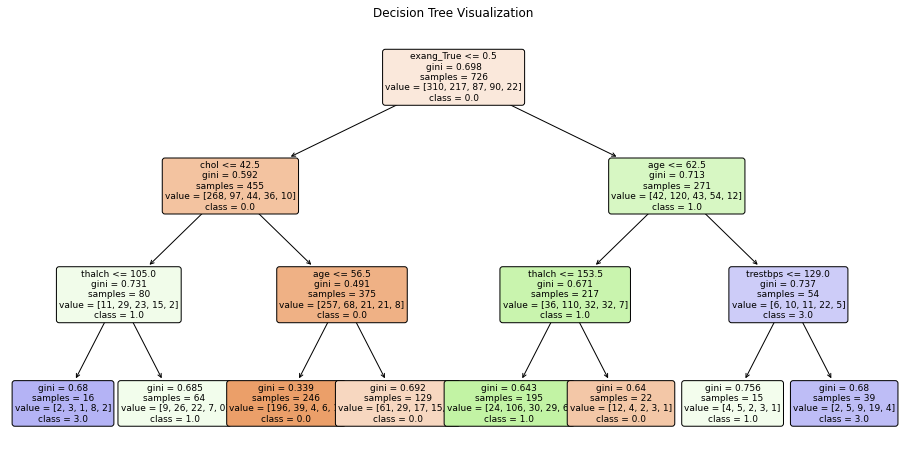

In [61]:
plt.figure(figsize=(16,8))
tree.plot_tree(
    best_tree,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree Visualization")
plt.show()